In [1]:
import os
from math import sqrt
import numpy as np
import torch
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

root_dir = '/content/drive/MyDrive/' # this is to be defined by you 
local_path = '/telecom/' # store the related data files in this folder
data_dir = root_dir + local_path
dataset=data_dir + "data.csv" 
data=pd.read_csv(dataset)


Mounted at /content/drive
Using device: cpu


In [2]:
data.isnull().sum()

month                               0
date                                0
start time                          0
end time                            0
location(latitude/lontitude)    47592
user id                             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611506 entries, 0 to 611505
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   month                         611506 non-null  int64 
 1   date                          611506 non-null  int64 
 2   start time                    611506 non-null  object
 3   end time                      611506 non-null  object
 4   location(latitude/lontitude)  563914 non-null  object
 5   user id                       611506 non-null  object
dtypes: int64(2), object(4)
memory usage: 28.0+ MB


In [28]:
data.iloc[: , 1:2].head(10)

,date
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [25]:
cols = data.columns # Saving column names to a variable
data[cols].apply(pd.to_numeric, errors='coerce') # Converting the columns to numeric

corr_mat = data.corr(method = 'pearson')
print(corr_mat)

       month  date
month    NaN   NaN
date     NaN   1.0


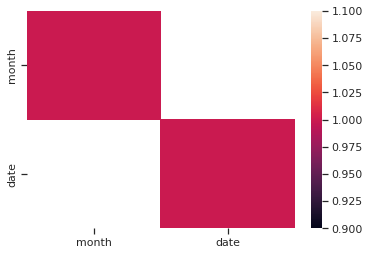

In [33]:
import seaborn as sns
corr = data.corr(method='kendall')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(data.shape)
data.info()

(611506, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611506 entries, 0 to 611505
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   month                         611506 non-null  int64 
 1   date                          611506 non-null  int64 
 2   start time                    611506 non-null  object
 3   end time                      611506 non-null  object
 4   location(latitude/lontitude)  563914 non-null  object
 5   user id                       611506 non-null  object
dtypes: int64(2), object(4)
memory usage: 28.0+ MB


In [ ]:
data.head()

,month,date,start time,end time,location(latitude/lontitude),user id
0,201406,1,6/1/2014 10:22,6/1/2014 11:09,31.237872/121.470259,edbc54bddf16494a49f39ac057b4185d
1,201406,1,6/1/2014 7:00,6/1/2014 8:49,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee
2,201406,1,6/1/2014 2:49,6/1/2014 5:49,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee
3,201406,1,6/1/2014 8:51,6/1/2014 9:20,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee
4,201406,1,5/31/2014 23:49,6/1/2014 2:49,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee


In [ ]:
data['start time'] = data['start time'].astype('datetime64[ns]')
data['end time'] = data['end time'].astype('datetime64[ns]')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611506 entries, 0 to 611505
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   month                         611506 non-null  int64         
 1   date                          611506 non-null  int64         
 2   start time                    611506 non-null  datetime64[ns]
 3   end time                      611506 non-null  datetime64[ns]
 4   location(latitude/lontitude)  563914 non-null  object        
 5   user id                       611506 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 28.0+ MB


In [ ]:
data[['longitude', 'latitude']] = data['location(latitude/lontitude)'].str.split('/', expand=True)
del data['location(latitude/lontitude)']
data.head()

,month,date,start time,end time,user id,longitude,latitude
0,201406,1,2014-06-01 10:22:00,2014-06-01 11:09:00,edbc54bddf16494a49f39ac057b4185d,31.237872,121.470259
1,201406,1,2014-06-01 07:00:00,2014-06-01 08:49:00,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259
2,201406,1,2014-06-01 02:49:00,2014-06-01 05:49:00,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259
3,201406,1,2014-06-01 08:51:00,2014-06-01 09:20:00,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259
4,201406,1,2014-05-31 23:49:00,2014-06-01 02:49:00,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259


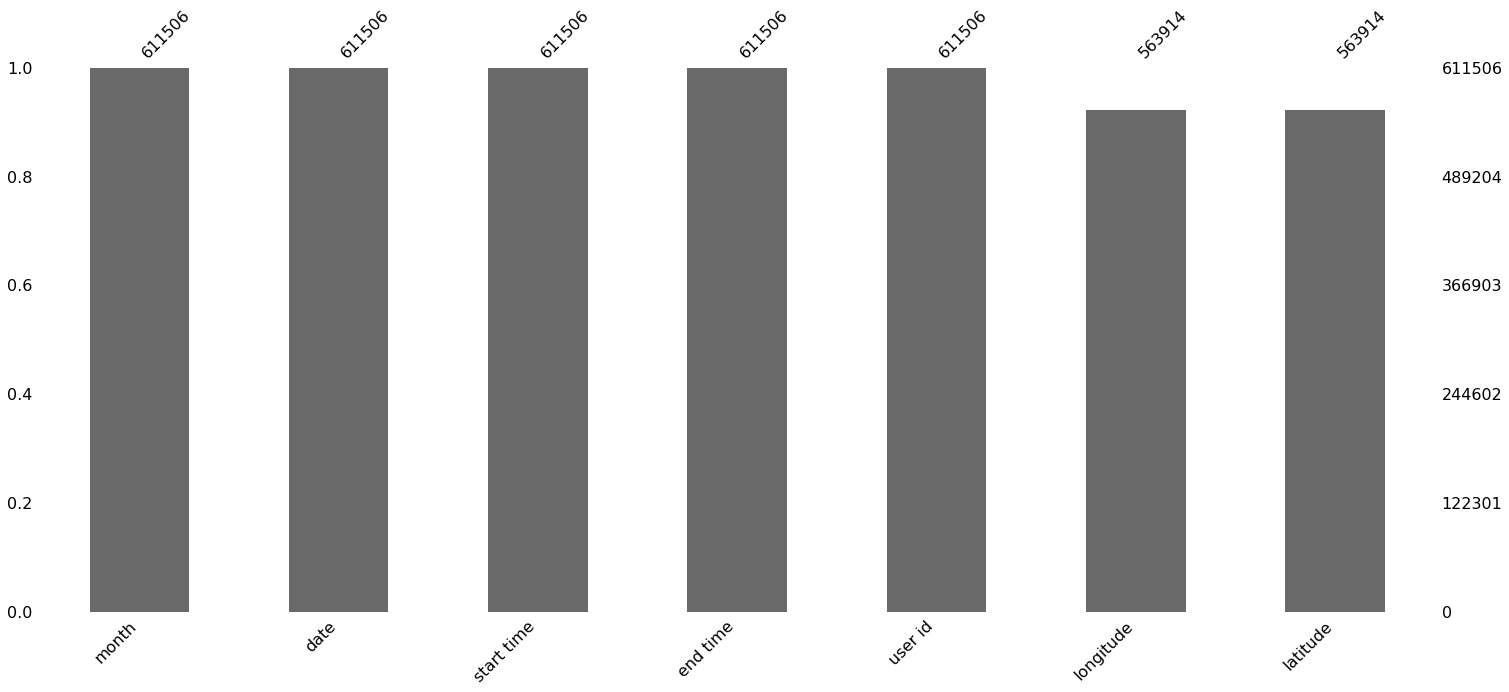

In [ ]:
import missingno
#data = data.dropna(subset=['start_time','end_time'])
missingno.bar(data)

In [ ]:
longi=[]
lati=[]
df = data.astype({'longitude':'float'})

for i in range(1,16):
  sub=df[df['date']==i]
  longi.append(sub['longitude'].mean())

print(longi)

df = data.astype({'latitude':'float'})
for i in range(1,16):
  sub=df[df['date']==i]
  lati.append(sub['latitude'].mean())

print(lati)
    
#data.start_date.value_counts(ascending=True)



[31.191069195922363, 31.20187533124763, 31.21115536626279, 31.202684292106447, 31.197657538459538, 31.208968237545925, 31.19925111642957, 31.185039942200532, 31.200185995788452, 31.19836561693804, 31.20151504509834, 31.194044106039396, 31.193051023246667, 31.187333590869436, 31.195538911485688]
[121.28366226204616, 121.26050718267804, 121.32651591526444, 121.334498785287, 121.32008949805945, 121.34003392631607, 121.32171803563334, 121.3152557336663, 121.33112352047067, 121.33780847354383, 121.339190440714, 121.3363357716978, 121.31568503231436, 121.33825440289195, 121.34062397591224]


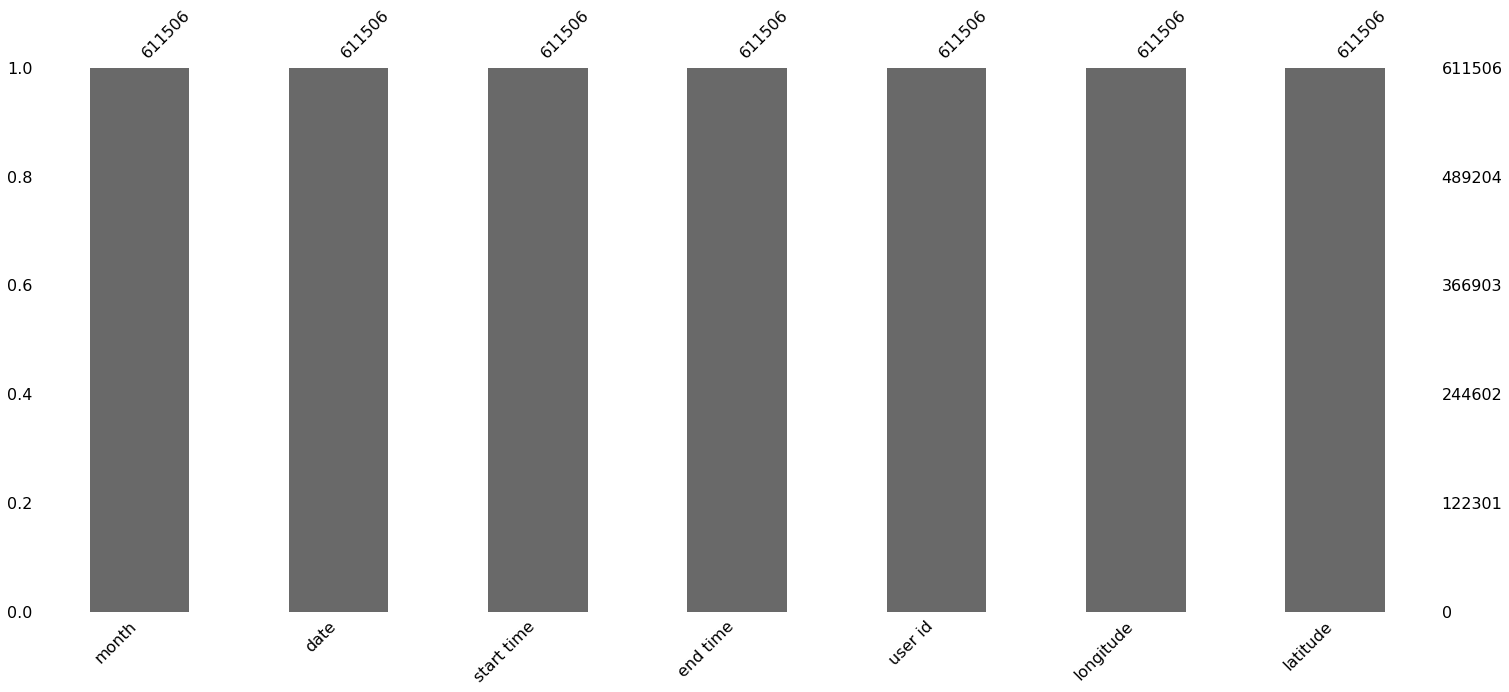

In [ ]:
for i in range(1,16):
  sub=df[df['date']==i]
  df['longitude'].fillna(longi[i-1],inplace=True)
  df['latitude'].fillna(lati[i-1],inplace=True)
missingno.bar(df)

In [ ]:
from google.colab import files

df.to_csv('disertn.csv', encoding = 'utf-8-sig') 
files.download('disertn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#df1.sort_values(by=['month'])
df1

,month,date,end time,user id,longitude,latitude
start time,,,,,,
2014-05-31 23:00:00,1114,1114,1114,1114,1114,1114
2014-06-01 00:00:00,906,906,906,906,906,906
2014-06-01 01:00:00,697,697,697,697,697,697
2014-06-01 02:00:00,580,580,580,580,580,580
2014-06-01 03:00:00,623,623,623,623,623,623
...,...,...,...,...,...,...
2014-06-15 19:00:00,1908,1908,1908,1908,1908,1908
2014-06-15 20:00:00,1792,1792,1792,1792,1792,1792
2014-06-15 21:00:00,1774,1774,1774,1774,1774,1774


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
df1['user id'].plot()
plt.show()

In [ ]:
from datetime import date as dt
load=(df.iloc[0]['start time']-df.iloc[0]['end time'])/ np.timedelta64(1, 's')/60
print(abs(load))

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Reverse Geocoding")

In [ ]:
tdf=df[:8000]
del tdf['start time']
del tdf['end time']
cities=[]

for i in range(tdf.shape[0]):
    lati=str(tdf.iloc[i]['longitude'])
    longi=str(tdf.iloc[i]['latitude'])
    location = geolocator.reverse(lati+","+longi, language='en')
    addr = location.raw['address']
    if('city' in (list(addr.keys()))):
        cities.append(addr['city'])
    else:
        cities.append('UNKNOWN')

tdf.loc[:,'cities']=cities

print(tdf)

In [ ]:
from google.colab import files

tdf.to_csv('section.csv', encoding = 'utf-8-sig') 
files.download('section.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tdf=df[55001:60000]
del tdf['start time']
del tdf['end time']
cities=[]

for i in range(tdf.shape[0]):
    lati=str(tdf.iloc[i]['longitude'])
    longi=str(tdf.iloc[i]['latitude'])
    location = geolocator.reverse(lati+","+longi, language='en')
    addr = location.raw['address']
    if('city' in (list(addr.keys()))):
        cities.append(addr['city'])
    else:
        cities.append('UNKNOWN')

tdf.loc[:,'cities']=cities

print(tdf)

        month  date                           user id  longitude    latitude  \
55001  201406     2  7eb81ff9609255b50f349502c9382404  31.231508  121.577691   
55002  201406     2  7eb81ff9609255b50f349502c9382404  31.231508  121.577691   
55003  201406     2  2e68f49027a694a0ca36d56bb179557e  31.231508  121.577691   
55004  201406     2  5f1621257f1701c5f6bbfdcba411b502  31.231508  121.577691   
55005  201406     2  5f1621257f1701c5f6bbfdcba411b502  31.231508  121.577691   
...       ...   ...                               ...        ...         ...   
59995  201406     2  dd90b8d14f4917852572404ae0cc776a  31.190185  121.443475   
59996  201406     2  dd90b8d14f4917852572404ae0cc776a  31.190185  121.443475   
59997  201406     2  9ea235280c158952b7849f351f490050  31.190185  121.443475   
59998  201406     2  9ea235280c158952b7849f351f490050  31.190185  121.443475   
59999  201406     2  8d559fef51e2c50c3925d498fa96d77f  31.190185  121.443475   

               cities  
55001          

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
